### TASK 1
- Download the monthly natural gas price data.
- Each point in the data set corresponds to the purchase price of natural gas at the end of a month, from 31st October 2020 to 30th September 2024.
- Analyze the data to estimate the purchase price of gas at any date in the past and extrapolate it for one year into the future.
- Your code should take a date as input and return a price estimate.

In [139]:
# load the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from datetime import date, timedelta
import seaborn as sns



In [159]:
# load the data
data = pd.read_csv('Nat_Gas.csv', parse_dates=['Dates'])
data['Dates'] = pd.to_datetime(data['Dates'])

# Get the values of dates and prices
prices = data['Prices'].values
dates = data['Dates'].values

data.head()



,Dates,Prices
0,2020-10-31,10.1
1,2020-11-30,10.3
2,2020-12-31,11.0
3,2021-01-31,10.9
4,2021-02-28,10.9


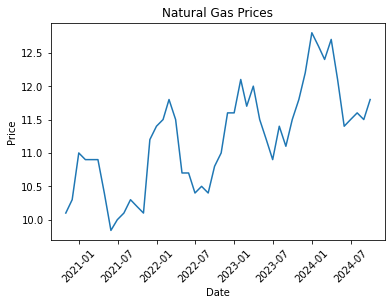

In [160]:
# plot prices against dates
fig, ax= plt.subplots()
ax.plot_date(dates, prices, '-')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Natural Gas Prices')
ax.tick_params(axis='x', rotation=45)

plt.show()




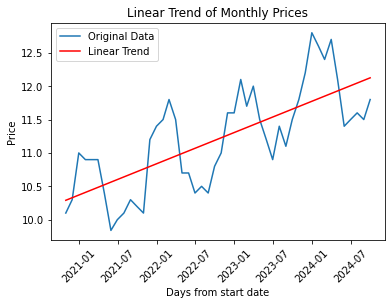

Slope: 0.0012823735987602181, and Intercept : 10.291041125952294


In [185]:
# Calculate time in days from start date.
start_date = dates.min()
period = (dates - start_date).astype('timedelta64[D]').astype(int)

# Create a simple linear regression to capture trend

reg_model = smf.ols(formula = 'prices ~ period', data = data).fit()

# Slope and intercept of the linear regression
slope = model.params[1]
intercept = model.params[0]


# Plotting 
plt.figure(figsize=(6, 4))
plt.plot(dates, prices,  linestyle='-', label='Original Data')
plt.plot(dates, period * slope + intercept, linestyle='-', color='red', label='Linear Trend')

plt.xlabel('Days from start date')
plt.ylabel('Price')
plt.title('Linear Trend of Monthly Prices')
plt.xticks(rotation=45)
plt.legend()
plt.show()



# Getting the Slope and Intercept
print(f'Slope: {model.params[1]}, and Intercept : {model.params[0]}')
    
  

In [176]:
#Aiming to capture intra-year variation using sinusodial model

price = prices - (period  * slope + intercept)  # Substracting linear trend from the prices to focus on the variations in prices
sin_time = np.sin(period * 2 * np.pi / (365))
cos_time = np.cos(period * 2 * np.pi / (365))

In [182]:
# Performing Multiple Regression to determine the amplitude and phase shift of the sinusoidal model of the form y = Acos(kt +z)

multreg_model = smf.ols(formula = 'price ~ sin_time + cos_time', data = data).fit()
slope_sin = model1.params[1]
slope_cos = model1.params[2]

In [183]:
# Determining the amplitude which represent the the maximum deviation from the mean price
# Phase shift which determines where the sinusoid starts within its cycle

amplitude = np.sqrt(slope_sin ** 2 + slope_cos ** 2)  
shift = np.arctan2(slope_cos, slope_sin)


In [184]:
# Interpolation/extrapolation function
def interpolate(date):
    days = (date - start_date).days
    return amplitude * np.sin(days * 2 * np.pi / 365 + shift) + days * slope + intercept

continuous_dates = pd.date_range(start=start_date, end=dates.max(), freq='D')

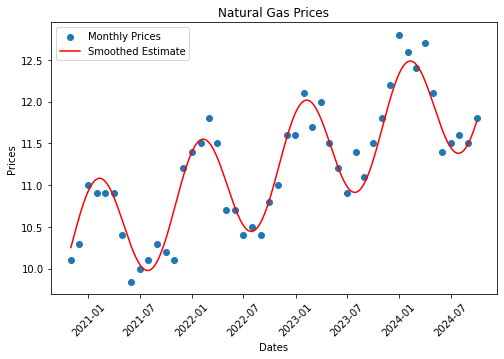

In [192]:
# Plotting 
plt.figure(figsize=(8, 5))
plt.scatter(dates, prices, marker='o', linestyle='-', label='Monthly Prices')
plt.plot(continuous_dates, [interpolate(date) for date in continuous_dates], linestyle='-', color='red', label='Smoothed Estimate')

plt.xlabel('Dates')
plt.ylabel('Prices')
plt.title('Natural Gas Prices')
plt.xticks(rotation=45)
plt.legend()

#plt.tight_layout()
plt.show()